Source: https://arxiv.org/pdf/1806.01559.pdf

Dataset: https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope

The data set was generated by a Monte Carlo program, Corsika, described in:
    D. Heck et al., CORSIKA, A Monte Carlo code to simulate extensive air showers,
    Forschungszentrum Karlsruhe FZKA 6019 (1998).
http://rexa.info/paper?id=ac6e674e9af20979b23d3ed4521f1570765e8d68

class[g,h] = [fLength]
,[fWidth] 
,[fSize] 
,[fConc]
,[fConc1]
,[fAsym]
,[fM3Long]
,[fM3Trans]
,[fAlpha]
,[fDist]

----------------------------

In [1]:
import numpy as np
import pandas as pd
import keras 
import tensorflow as tf
import random
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


In [3]:
x_train = x_train.reshape((x_train.shape[0],28,28,1))
x_train = x_train.astype('float32')/255.0

In [4]:
y_train = tf.keras.utils.to_categorical(y_train)

In [5]:
model = Sequential([
    tf.keras.layers.Conv2D(32, (3,3),activation='relu',input_shape=(28,28,1))
    ,tf.keras.layers.MaxPooling2D((2,2))
    ,tf.keras.layers.Flatten()
    ,tf.keras.layers.Dense(100,activation='relu')
    ,tf.keras.layers.Dense(10,activation='softmax')
])

In [6]:
optimizer = SGD(learning_rate=0.01,momentum=0.9)
model.compile(optimizer=optimizer
             ,loss='categorical_crossentropy'
             ,metrics =['accuracy']
             )

In [7]:
history = model.fit(x_train,y_train,epochs=3,batch_size=32)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8577 - loss: 0.4494
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9746 - loss: 0.0858
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9854 - loss: 0.0489


In [84]:

image = random.choice(x_test)

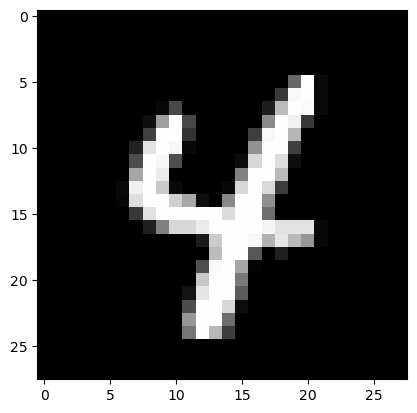

In [85]:
plt.imshow(image, cmap=plt.get_cmap('gray'))
plt.show()

In [86]:
image = (image.reshape(1,28,28,1)).astype('float32')/255

digit = np.argmax(model.predict(image)[0], axis=-1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [87]:
print('Prediction:',digit)

Prediction: 4
